In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#lendo e entendendo os dados
df_raw = pd.read_csv('sao-paulo-properties-april-2019.csv')
df_raw.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [4]:
#Trabalhado apenas com os regimes de aluguel
df_rent = df_raw[df_raw["Negotiation Type"] == 'rent']

In [5]:
#Verificando se existem dados nulos a serem tratados, os tipos de dados e uma noção dos dados
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory usa

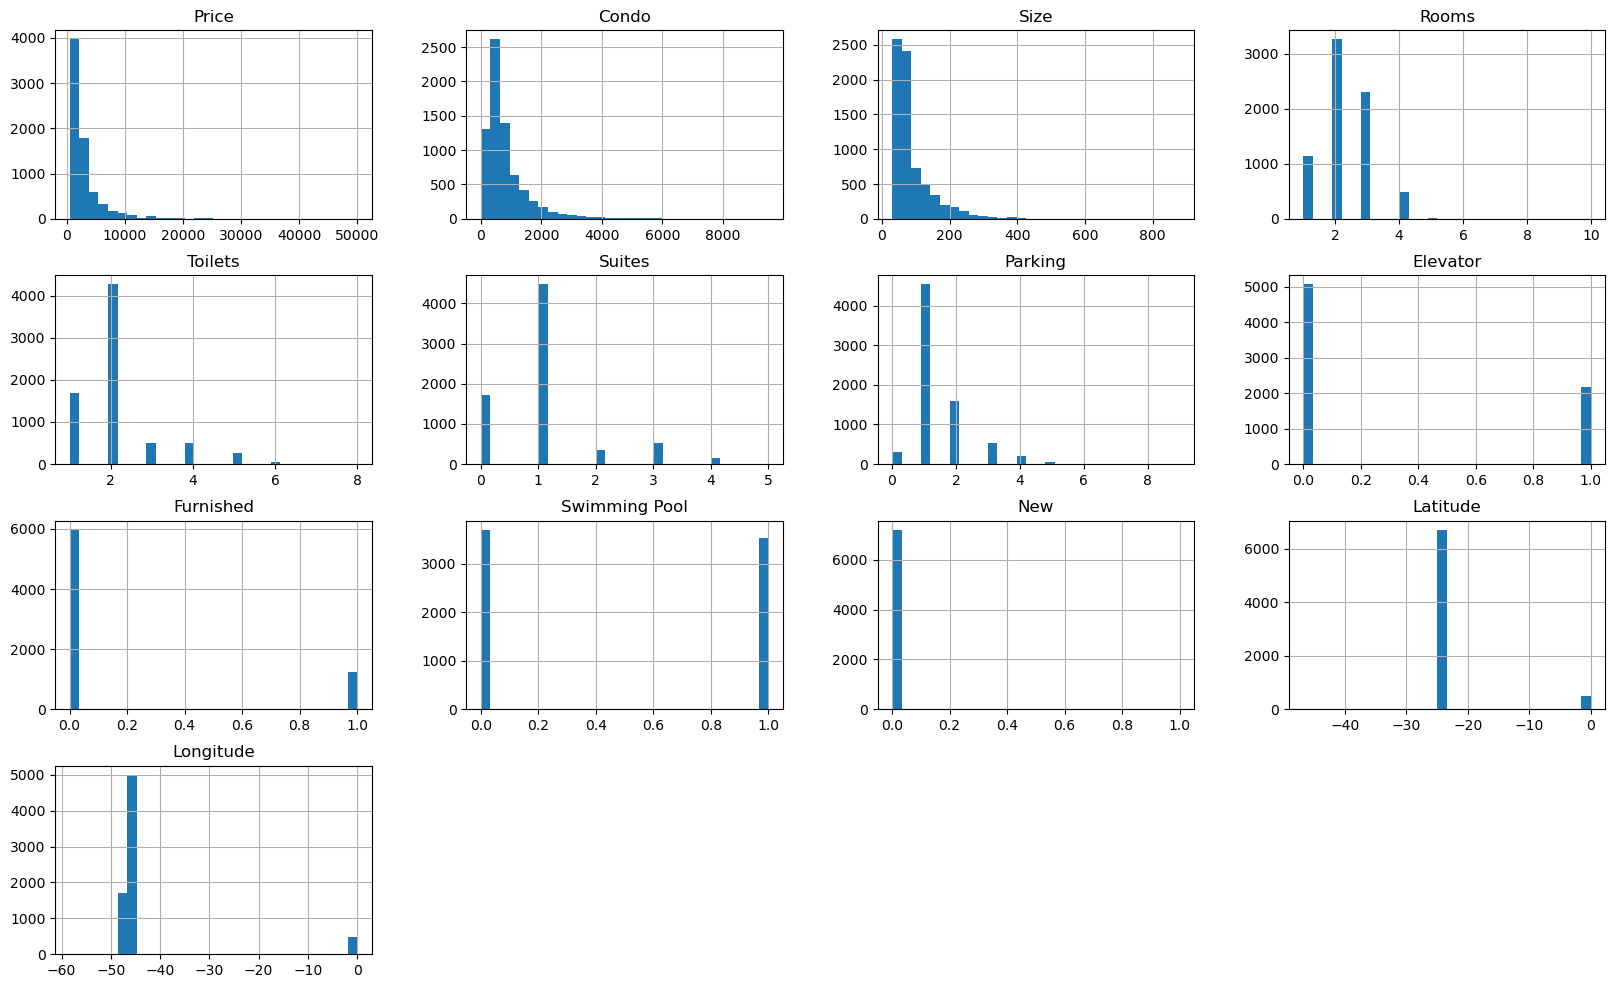

In [6]:
#Dando uma olhada na distribuicao dos dados numericos
df_rent.hist(figsize=(20,12), bins=30)
plt.show()

In [7]:
#verificando como estao distribuidos os dados categoricos
df_rent['Property Type'].value_counts()

Property Type
apartment    7228
Name: count, dtype: int64

In [8]:
df_rent['District']. value_counts()

District
Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Pinheiros/São Paulo          153
                            ... 
Lajeado/São Paulo              8
Guaianazes/São Paulo           6
Parque do Carmo/São Paulo      6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: count, Length: 94, dtype: int64

In [9]:
#com base no acima exposto, irei retirar do corte de df_rent as colunas 'Negotiation Type', 'New' e 'Property Typer', por serem caracteristicas constantes.
df_rent = df_rent.drop(['New', 'Property Type', 'Negotiation Type'], axis=1)
df_rent.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436


In [10]:
#vou chamar uma matriz de correlacao, e filtra-la pra entender qual variavel melhor se relaciona com o preço
df_rent.corr(numeric_only=True)['Price'].sort_values(ascending=False)


Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64

In [20]:
#Vou dar um trato no dado categóricos de distrito Aqui vou optar pro tipo OneHot por ter muitos valores diferentes. 
#Por ser um df simples, sem novos entrantes, vou utilizar o get_dummies mesmo (nao armazena a regra pra fazer esse procedimento pra novos dados)
one_hot = pd.get_dummies(df_rent['District'], dtype=int)
df_rent = df_rent.drop('District', axis=1)
df = df_rent.join(one_hot)


In [22]:
#Vou fazer a separação entre os dados de treino e os dados de teste (70/30)
from sklearn.model_selection import train_test_split

In [24]:
#Separando tudo que é de preço (que é o que eu quero que a maquina seja capaz de prever) das demais informações
Y = df['Price']
X = df.drop('Price', axis=1)

In [26]:
#Separando, x e y de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [28]:
#Vou começar testando um modelinho de regressão linear
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [30]:
#Vendo como ele performou. Aqui eu optei por usar RMSE pra visualizar esse erro inicialmente
from sklearn.metrics import mean_squared_error
preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

1921.0722581135988

In [32]:
#Utilizando cross-validation
from sklearn.model_selection import cross_val_score
scores_lin = cross_val_score(lin_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores_lin)

#vou dar um display simples aqui
def show_scores(scores):
    print('Scores: ', scores)
    print('Média: ', scores.mean())
    print('Desvio Padrão: ', scores.std())

show_scores(lin_rmse_scores)

Scores:  [2635.32734393 1715.78909978 1725.98010153 2199.79903963 2316.94248306
 1585.79343063 2111.29507925 1746.00754338 1601.56241128 1682.9714885 ]
Média:  1932.1468020942252
Desvio Padrão:  340.8167598072007


In [34]:
#Vou testar um de arvore de decisao
from sklearn.tree import DecisionTreeRegressor
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [36]:
#novamente, vendo como ele performou com os mesmo parâmetros de erro
preds_tree = dtree_reg.predict(x_train)
dtree_mse = mean_squared_error(y_train, preds_tree)
dtree_rmse = np.sqrt(dtree_mse)
dtree_rmse

40.80603836059601

In [38]:
#Utilizando cross-validation
scores = cross_val_score(dtree_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

show_scores(tree_rmse_scores)

Scores:  [2425.73649394 2115.29221795 2613.32729827 2950.77774403 2645.11180172
 1903.36609376 2869.51548507 2094.66860596 2421.94308058 2568.6365236 ]
Média:  2460.8375344899277
Desvio Padrão:  322.9381288609629


In [45]:
#testando um ultimo modelo de florestas aleatorias (reg)
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [51]:
#novamente, rmse
preds_rf = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds_rf)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

714.7527147699602

In [49]:
#Utilizando cross-validation novamente
rf_scores = cross_val_score(rf_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)

show_scores(rf_rmse_scores)

Scores:  [2246.96774587 1606.89947525 1528.38785823 2038.64462724 2414.85043076
 1290.38463373 2151.98683724 1681.77767227 1378.95600901 1691.89945576]
Média:  1803.075474536957
Desvio Padrão:  365.00434283057814


In [54]:
#Avaliando os 3 modelos acima treinados, decidir seguir com o Rendom Forest Reg por ter demonstrado o melhor desempenho no cross-validation
#Agora vou testar algumas combinações de hiperparametros pra ver a que melhor se comporta pra melhorar a maquina 
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [60]:
#Agora que eu testei algumas combinações simples de parâmetros, vou trabalhar no modelo final e aplicar para as variáveis de teste
final_model = grid_search.best_estimator_
final_model_preds = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_model_preds)
print(np.sqrt(final_mse)) #RMSE

1826.6549977151033


In [ ]:
#Dessa forma, conclui-se o treinamento e o teste de um modelo simples de ML, mas que elucida a forte capacidade de sua implementação

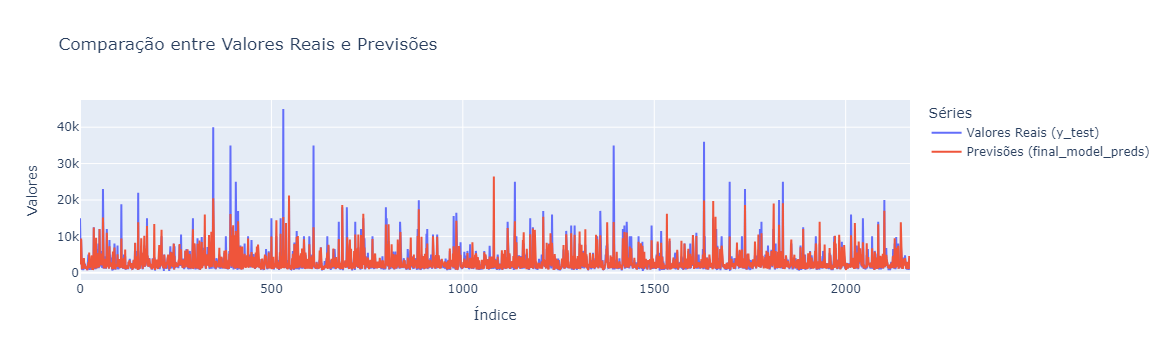

In [84]:
#Gráfico para visualização da disparidade entre os valores preditos e reais
fig = go.Figure(data=[
    go.Scatter(y=y_test.values, mode='lines', name='Valores Reais (y_test)'),
    go.Scatter(y=final_model_preds, mode='lines', name='Previsões (final_model_preds)')
])

# Ajustar o layout para incluir zoom inicial
fig.update_layout(title="Comparação entre Valores Reais e Previsões",
    xaxis_title="Índice",
    yaxis_title="Valores",
    legend_title="Séries"
)

fig.show()